# Dataset Census
## Importanção da biblioteas necessarias
importação das bibliotecas

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

### Ler dataset

In [62]:
base = pd.read_csv('../dataset/census.csv')

Previa das 3 primeira linha da base de dados

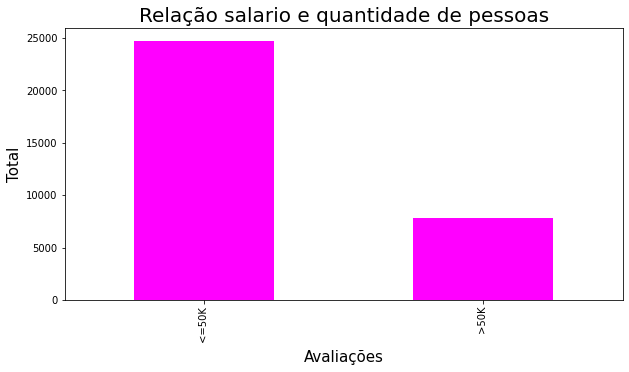

In [118]:
base['income'].value_counts().plot.bar(color = 'magenta',figsize=(10, 5))
plt.title('Relação salario e quantidade de pessoas', fontsize=20)
plt.xlabel('Avaliações', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

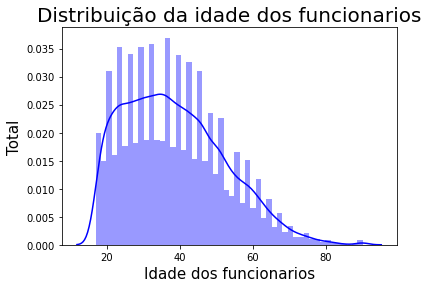

In [112]:
sns.distplot(base['age'],color='blue')
plt.title('Distribuição da idade dos funcionarios', fontsize=20)
plt.xlabel('Idade dos funcionarios', fontsize=15)
plt.ylabel('Total', fontsize=15)
plt.show()

In [63]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
base.shape

(32561, 15)

O dataset possui 15 colunas numeradas do 0 ao 14.
as primeira 14 colunas [0:14] são os atributos, e a ultima coluna a 14 é o target

In [65]:
previsores = base.iloc[:,0:14].values
classe = base.iloc[:,14].values

In [66]:
encoder = LabelEncoder()
previsores[:,1] = encoder.fit_transform(previsores[:,1])
previsores[:,3] = encoder.fit_transform(previsores[:,3])
previsores[:,5] = encoder.fit_transform(previsores[:,5])
previsores[:,6] = encoder.fit_transform(previsores[:,6])
previsores[:,7] = encoder.fit_transform(previsores[:,7])
previsores[:,8] = encoder.fit_transform(previsores[:,8])
previsores[:,9] = encoder.fit_transform(previsores[:,9])
previsores[:,13] = encoder.fit_transform(previsores[:,13])

In [67]:
#com isso apresenta resultados ruim
#onehot = OneHotEncoder()
#previsores = onehot.fit_transform(previsores).toarray()

In [68]:
#classe = classe.reshape(-1,1)
enc_cla = LabelEncoder()
classe = enc_cla.fit_transform(classe)

In [69]:
le_name_mapping = dict(zip(enc_cla.classes_, enc_cla.transform(enc_cla.classes_)))
le_name_mapping

{' <=50K': 0, ' >50K': 1}

In [70]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [104]:
clf = RandomForestClassifier(n_estimators=50,random_state=0,criterion='gini')
clf.fit(xtrain,ytrain)


RandomForestClassifier(n_estimators=50, random_state=0)

In [105]:
pred = clf.predict(xtest)

In [106]:
accuracy_score(ytest,pred)

0.8590511285122063

In [107]:
matrix = confusion_matrix(ytest,pred)

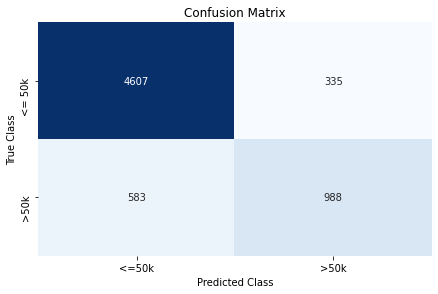

In [108]:
dataframe = pd.DataFrame(matrix, index=['<= 50k','>50k'], columns=['<=50k','>50k'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()